# **Project Name**    - **Water Quality Analysis & Classification – Machine Learning**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

## **Water Quality Analysis & Classification – Machine Learning**

#### **Project Summary**

In the critical domain of environmental monitoring and public health, rapid and accurate water quality analysis is essential for preventing pollution-related hazards and ensuring ecosystem sustainability. This project focuses on analyzing 222+ water sample records to identify key physicochemical factors influencing Water Quality Classes. Using advanced machine learning techniques, the project predicts quality grades (Class A-E) and provides actionable insights to automate pollution detection and optimize resource allocation for water treatment.

#### **Dataset Overview**

The dataset contains water quality monitoring data from various regional sampling stations. It includes key attributes such as physical properties (Temperature, pH, Conductivity, Turbidity), chemical indicators (Dissolved Oxygen, BOD, COD, Nitrates, Sulphates), and biological parameters (Coliform counts).

The target variable is **Use Based Class**, a categorical label classifying water suitability ranging from **Class A (Drinking Source without conventional treatment)** to **Class E (Irrigation/Industrial Cooling)**.

#### **Analysis Approach**

The project follows a systematic machine learning workflow:

* **Data Preprocessing:** Cleaned and refined the raw dataset using median imputation for numerical columns, label encoding for categorical markers, and standard scaling to normalize sensor ranges.

* **Feature Engineering:** Created 4+ new attributes (e.g., BOD/COD Ratio, pH Deviation, Pollution Index) to capture complex chemical interactions and improve model interpretability.

* **Model Building:** Developed classification models (Logistic Regression, Decision Tree, Random Forest, XGBoost) to predict the five Water Quality classes.

* **Evaluation:** Selected the best-performing model (XGBoost) with a focus on Weighted F1 Score and Accuracy (94.4%), as these metrics ensure robust performance across all classes, specifically addressing the class imbalance which was mitigated using SMOTE (Synthetic Minority Over-sampling Technique).


# **GitHub Link -**

https://github.com/Mrityunjoy05/Water-Quality-Analysis---Classification-Machine-Learning

# **Problem Statement**


In the field of environmental science, real-time water safety monitoring is crucial for public health. Traditional laboratory testing is slow and labor-intensive. This project analyzes physicochemical telemetry data to identify key drivers of water pollution and predict quality classes using machine learning. Insights from the analysis help optimize sensor maintenance, automate pollution alerts, and enhance the overall efficiency of water resource management strategies.

#### **Define Your Business Objective?**

**Business Objective**: Automating Water Quality Classification to Enable Real-Time Pollution Detection and Optimize Environmental Safety Protocols.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [86]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations


import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For statistical data visualization


from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier # Decision Tree model
from sklearn.ensemble import RandomForestClassifier # Random Forest model
from xgboost import XGBClassifier # XGBoost model


# from category_encoders import TargetEncoder # For target encoding categorical variables
from sklearn.preprocessing import  StandardScaler,LabelEncoder#  Feature Scaling
from imblearn.over_sampling import SMOTE # To handle class imbalance by oversampling


from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, make_scorer, roc_auc_score, recall_score ,confusion_matrix, ConfusionMatrixDisplay # For performance evaluation


from typing import List ,Dict

import warnings # To handle warnings
warnings.filterwarnings("ignore") # Suppresses all warnings from appearing


# Mount Google Drive to Access Files (Specific to Google Colab)
# from google.colab import drive # Import drive module from Colab


# drive.mount('/content/drive') # Mount Google Drive to access stored files


# Configure pandas display options
pd.set_option('display.max_columns', None) # Display all columns in output

### Dataset Loading

In [87]:
# Load Dataset

# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    """
    Loads a CSV file into a pandas DataFrame.
    If an error occurs (e.g., file not found), it prints the error and returns None.

    Parameters:
    file_path (str): The file path of the CSV file.

    Returns:
    pd.DataFrame or None: Returns the loaded DataFrame if successful, otherwise None.
    """
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure


In [88]:
# # Define file paths for the dataset
path_df = '/content/Project file.csv'


# Load the dfs using the load_csv function
dataset = pd.read_csv(path_df , encoding="latin-1")  # Load the CSV file into a DataFrame

### Dataset First View

In [89]:
# Dataset First Look
dataset.head()

,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,Mon Agency,Frequency,Major Polluting Sources,Use Based Class,Use of Water in Down Stream,Visibility Effluent Discharge,Weather,Approx Depth,Human Activities,Floating Matter,Color,Odor,Flow,Temperature,Dissolved O2,pH,Conductivity,BOD,Nitrate N,Fecal Coliform,Total Coliform,Fecal Streptococci,Turbidity,Phenophelene Alkanity,Total Alkalinity,Chlorides,COD,Total Kjeldahl N,Amonia N,Hardness CaCo3,Calcium CaCo3,Magnesium CaCo3,Sulphate,Sodium,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
0,1312,08-05-2025,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,1.0,28.0,6.7,8.4,575.0,3.2,0.54,1.8(BDL),35,1.8(BDL),1(BDL),6,122,58.48,16.0,1.68,0.43,144.0,64.0,80.0,72,60.44,497.0,448.0,10(BDL),0.78,0.58,2.88,0.5,NaN,19°29.263',75°22.272'
1,2158,08-05-2025,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.0,28.0,6.6,8.3,576.0,3.2,0.52,1.8(BDL),25,1.8(BDL),1.02,6,120,63.48,16.0,2.8,0.86,142.0,66.0,76.0,68.88,61.1,489.0,441.0,11,0.71,0.61,3.14,0.41,NaN,19°30.887,75°22.457
2,2159,08-05-2025,Aug,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.0,28.0,6.9,8.5,573.0,3.2,0.56,1.8(BDL),20,1.8(BDL),1.02,6,140,58.98,16.0,3.36,1.80,140.0,62.0,78.0,68.54,67.84,491.0,442.0,11,0.76,0.56,3.16,0.45,NaN,19°28.835,75°23.835
3,2160,08-05-2025,Aug,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.0,28.0,7,7.9,592.0,3.4,0.58,1.8(BDL),13,1.8(BDL),1.02,6,140,55.98,20.0,2.24,0.40,140.0,72.0,68.0,73.3,55.38,479.0,612.0,10(BDL),1.47,0.55,3.13,0.6,NaN,19°37.463,75°01.490
4,2161,08-04-2025,Aug,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Less than 50cm,Others,Yes,Clear,NaN,2.0,29.0,6.6,8.7,922.0,3.8,0.63,1.8(BDL),14,1.8(BDL),1.03,6,130,98.47,20.0,1.68,0.44,160.0,82.0,78.0,128.8,114.98,765.0,689.0,12,0.33,0.56,4.57,0.49,NaN,19°21.392,75°42.870


### Dataset Rows & Columns count

In [90]:
# Dataset Rows & Columns count
dataset.shape

(222, 54)

### Dataset Information

In [91]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STN Code                        222 non-null    int64  
 1   Sampling Date                   222 non-null    object 
 2   Month                           222 non-null    object 
 3   Sampling Time                   222 non-null    object 
 4   Stn Name                        222 non-null    object 
 5   Type Water Body                 222 non-null    object 
 6   Name Of Water Body              200 non-null    object 
 7   River Basin                     198 non-null    object 
 8   District                        222 non-null    object 
 9   State Name                      222 non-null    object 
 10  Mon Agency                      222 non-null    object 
 11  Frequency                       222 non-null    object 
 12  Major Polluting Sources         149 

#### Duplicate Values

In [92]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [93]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

STN Code                            0
Sampling Date                       0
Month                               0
Sampling Time                       0
Stn Name                            0
Type Water Body                     0
Name Of Water Body                 22
River Basin                        24
District                            0
State Name                          0
Mon Agency                          0
Frequency                           0
Major Polluting Sources            73
Use Based Class                     7
 Use of Water in Down Stream      222
 Visibility Effluent Discharge     94
Weather                             7
Approx Depth                        7
Human Activities                    7
Floating Matter                     7
Color                               7
Odor                              170
Flow                                7
Temperature                        29
Dissolved O2                        7
pH                                  7
Conductivity

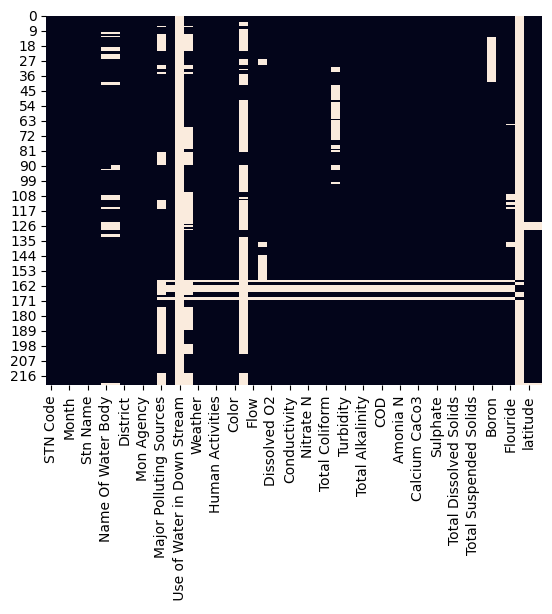

In [94]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

## ***2. Understanding Your Variables***

In [95]:
# Dataset Columns
dataset.columns

Index(['STN Code', 'Sampling Date', 'Month', 'Sampling Time', 'Stn Name',
       'Type Water Body', 'Name Of Water Body', 'River Basin', 'District',
       'State Name', 'Mon Agency', 'Frequency', 'Major Polluting Sources',
       'Use Based Class', ' Use of Water in Down Stream',
       ' Visibility Effluent Discharge', 'Weather', 'Approx Depth',
       'Human Activities', 'Floating Matter', 'Color', 'Odor', 'Flow',
       'Temperature', 'Dissolved O2', 'pH', 'Conductivity', 'BOD', 'Nitrate N',
       'Fecal Coliform', 'Total Coliform', 'Fecal Streptococci', 'Turbidity',
       'Phenophelene Alkanity', 'Total Alkalinity', 'Chlorides', 'COD',
       'Total Kjeldahl N', 'Amonia N', 'Hardness CaCo3', 'Calcium CaCo3',
       'Magnesium CaCo3', 'Sulphate', 'Sodium', 'Total Dissolved Solids',
       'Total Fixed Solids', 'Total Suspended Solids', 'Phosphate', 'Boron',
       'Potassium', 'Flouride', 'Remark', 'latitude', 'longitude'],
      dtype='object')

In [96]:
# Dataset Describe
dataset.describe(include='all')

,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,Mon Agency,Frequency,Major Polluting Sources,Use Based Class,Use of Water in Down Stream,Visibility Effluent Discharge,Weather,Approx Depth,Human Activities,Floating Matter,Color,Odor,Flow,Temperature,Dissolved O2,pH,Conductivity,BOD,Nitrate N,Fecal Coliform,Total Coliform,Fecal Streptococci,Turbidity,Phenophelene Alkanity,Total Alkalinity,Chlorides,COD,Total Kjeldahl N,Amonia N,Hardness CaCo3,Calcium CaCo3,Magnesium CaCo3,Sulphate,Sodium,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
count,222.000000,222,222,222,222,222,200,198,222,222,222,222,149,215,0.0,128,215,215,215,215,215,52,215.000000,193.000000,215,215.000000,215.000000,215.000000,215,215,215,174,215,215,215,215,215.000000,215,215.000000,215.000000,215.000000,215.000000,215,215,215.000000,215.000000,215,215,188,215,204,7,216,216
unique,NaN,7,1,93,222,7,96,93,23,1,1,1,3,5,NaN,2,3,3,19,2,9,5,NaN,NaN,50,NaN,NaN,NaN,126,51,39,17,120,25,111,161,NaN,20,NaN,NaN,NaN,NaN,171,188,NaN,NaN,58,61,39,107,47,1,214,214
top,NaN,08-06-2025,Aug,11:00:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Thane,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Less than 50cm,Others,Yes,Clear,Odor Free,NaN,NaN,7,NaN,NaN,NaN,0.3(BDL),1.8(BDL),540,1.8(BDL),1(BDL),5(BDL),62,15,NaN,1.5(BDL),NaN,NaN,NaN,NaN,5(BDL),5(BDL),NaN,NaN,10(BDL),0.2(BDL),0.5(BDL),1(BDL),0.2(BDL),Dry river,20°37.169,78° 07.934
freq,NaN,63,222,9,1,172,9,9,39,222,222,222,134,141,NaN,120,183,188,131,179,187,44,NaN,NaN,19,NaN,NaN,NaN,20,28,35,143,77,165,7,7,NaN,101,NaN,NaN,NaN,NaN,22,22,NaN,NaN,40,101,131,91,115,7,2,2
mean,2615.716216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326512,25.963731,NaN,7.900465,4601.869767,9.106512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.056279,NaN,1.051628,597.605581,149.728372,447.691116,NaN,NaN,3651.939535,3217.614884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1274.980701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.058607,3.006717,NaN,0.438721,11045.712262,17.544468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.590407,NaN,1.960582,1295.815299,217.426974,1084.977965,NaN,NaN,8778.601406,7763.467270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,18.000000,NaN,6.900000,45.000000,1.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,0.400000,16.000000,8.000000,8.000000,NaN,NaN,36.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2162.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,24.000000,NaN,7.600000,224.000000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,0.400000,70.000000,40.000000,32.000000,NaN,NaN,173.000000,151.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2668.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,27.000000,NaN,7.900000,421.000000,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,0.400000,130.000000,66.000000,60.000000,NaN,NaN,316.000000,265.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2767.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,28.000000,NaN,8.200000,820.000000,8.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.050000,NaN,0.690000,235.700000,130.400000,105.000000,NaN,NaN,526.000000,454.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check Unique Values for each variable.

In [97]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  STN Code is 222 .
No. of unique values in  Sampling Date is 7 .
No. of unique values in  Month is 1 .
No. of unique values in  Sampling Time is 93 .
No. of unique values in  Stn Name is 222 .
No. of unique values in  Type Water Body is 7 .
No. of unique values in  Name Of Water Body is 96 .
No. of unique values in  River Basin is 93 .
No. of unique values in  District is 23 .
No. of unique values in  State Name is 1 .
No. of unique values in  Mon Agency is 1 .
No. of unique values in  Frequency is 1 .
No. of unique values in  Major Polluting Sources is 3 .
No. of unique values in  Use Based Class is 5 .
No. of unique values in   Use of Water in Down Stream is 0 .
No. of unique values in   Visibility Effluent Discharge is 2 .
No. of unique values in  Weather is 3 .
No. of unique values in  Approx Depth is 3 .
No. of unique values in  Human Activities is 19 .
No. of unique values in  Floating Matter is 2 .
No. of unique values in  Color is 9 .
No. of unique value

## ***3. Data Wrangling***

### Data Wrangling Code

In [98]:
# Write your code to make your dataset analysis ready.
df = dataset.copy()

In [99]:
df.columns = [i.strip().replace(" " , '_').replace("(" , '').replace(")" , '').replace("-" , '_') for i in df.columns] # Replace spaces and symbols in column names

In [100]:
df.columns = df.columns.str.strip().str.lower() # Convert column names to lowercase and strip spaces

In [101]:
df.info() # Display updated DataFrame info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   stn_code                       222 non-null    int64  
 1   sampling_date                  222 non-null    object 
 2   month                          222 non-null    object 
 3   sampling_time                  222 non-null    object 
 4   stn_name                       222 non-null    object 
 5   type_water_body                222 non-null    object 
 6   name_of_water_body             200 non-null    object 
 7   river_basin                    198 non-null    object 
 8   district                       222 non-null    object 
 9   state_name                     222 non-null    object 
 10  mon_agency                     222 non-null    object 
 11  frequency                      222 non-null    object 
 12  major_polluting_sources        149 non-null    obj

In [102]:
df.use_based_class.value_counts().reset_index()

,use_based_class,count
0,A (Drinking Water source without conventional ...,141
1,No Information,44
2,"E (Irrigation, industrial cooling and controll...",19
3,C (Drinking water source),6
4,B (Outdoor bathing(Organized)),5


In [103]:
df = df[df["use_based_class"] != "No Information"]


In [104]:
df.columns  # Show updated column names

Index(['stn_code', 'sampling_date', 'month', 'sampling_time', 'stn_name',
       'type_water_body', 'name_of_water_body', 'river_basin', 'district',
       'state_name', 'mon_agency', 'frequency', 'major_polluting_sources',
       'use_based_class', 'use_of_water_in_down_stream',
       'visibility_effluent_discharge', 'weather', 'approx_depth',
       'human_activities', 'floating_matter', 'color', 'odor', 'flow',
       'temperature', 'dissolved_o2', 'ph', 'conductivity', 'bod', 'nitrate_n',
       'fecal_coliform', 'total_coliform', 'fecal_streptococci', 'turbidity',
       'phenophelene_alkanity', 'total_alkalinity', 'chlorides', 'cod',
       'total_kjeldahl_n', 'amonia_n', 'hardness_caco3', 'calcium_caco3',
       'magnesium_caco3', 'sulphate', 'sodium', 'total_dissolved_solids',
       'total_fixed_solids', 'total_suspended_solids', 'phosphate', 'boron',
       'potassium', 'flouride', 'remark', 'latitude', 'longitude'],
      dtype='object')

In [105]:
# Function to check the percentage of missing values in each column

def null_percentage_checker(df):
    """Prints the percentage of missing values for each column in a DataFrame."""
    try:
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame.")
        for col in df.columns:
            print(f'{col} : {df[col].isna().mean() * 100:.2f}%')
    except Exception as e:
        print(f"Error: {e}")

# Call the function to check for missing values
null_percentage_checker(df = df)

stn_code : 0.00%
sampling_date : 0.00%
month : 0.00%
sampling_time : 0.00%
stn_name : 0.00%
type_water_body : 0.00%
name_of_water_body : 11.24%
river_basin : 12.36%
district : 0.00%
state_name : 0.00%
mon_agency : 0.00%
frequency : 0.00%
major_polluting_sources : 23.03%
use_based_class : 3.93%
use_of_water_in_down_stream : 100.00%
visibility_effluent_discharge : 39.33%
weather : 3.93%
approx_depth : 3.93%
human_activities : 3.93%
floating_matter : 3.93%
color : 3.93%
odor : 78.65%
flow : 3.93%
temperature : 16.29%
dissolved_o2 : 3.93%
ph : 3.93%
conductivity : 3.93%
bod : 3.93%
nitrate_n : 3.93%
fecal_coliform : 3.93%
total_coliform : 3.93%
fecal_streptococci : 20.79%
turbidity : 3.93%
phenophelene_alkanity : 3.93%
total_alkalinity : 3.93%
chlorides : 3.93%
cod : 3.93%
total_kjeldahl_n : 3.93%
amonia_n : 3.93%
hardness_caco3 : 3.93%
calcium_caco3 : 3.93%
magnesium_caco3 : 3.93%
sulphate : 3.93%
sodium : 3.93%
total_dissolved_solids : 3.93%
total_fixed_solids : 3.93%
total_suspended_sol

In [106]:
df["major_polluting_sources_missing"] = (
    df["major_polluting_sources"].isnull().astype(int)
)

df["major_polluting_sources"] = (
    df["major_polluting_sources"].fillna("Unknown")
)


In [107]:
df["visibility_effluent_discharge_missing"] = (
    df["visibility_effluent_discharge"].isnull().astype(int)
)

df["visibility_effluent_discharge"] = (
    df["visibility_effluent_discharge"].fillna("Unknown")
)


In [108]:
cols_to_remove = ['use_of_water_in_down_stream', 'remark']
existing_cols = [col for col in cols_to_remove if col in df.columns]
if existing_cols:
    print(f"   Removing ({len(existing_cols)}): {existing_cols}")
    df = df.drop(columns=existing_cols)

   Removing (2): ['use_of_water_in_down_stream', 'remark']


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 221
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   stn_code                               178 non-null    int64  
 1   sampling_date                          178 non-null    object 
 2   month                                  178 non-null    object 
 3   sampling_time                          178 non-null    object 
 4   stn_name                               178 non-null    object 
 5   type_water_body                        178 non-null    object 
 6   name_of_water_body                     158 non-null    object 
 7   river_basin                            156 non-null    object 
 8   district                               178 non-null    object 
 9   state_name                             178 non-null    object 
 10  mon_agency                             178 non-null    object 
 11  frequency  

In [110]:
def impute_dataframe(
    df: pd.DataFrame,
    target_col: str
):
    """
    Imputes missing values only:
    - Numerical columns -> median
    - Categorical columns -> 'Unknown'
    - Target column is NOT imputed
    """

    df = df.copy()

    # -------------------------
    # 1. Numerical columns → Median
    # -------------------------
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [c for c in numeric_cols if c != target_col]

    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())

    # -------------------------
    # 2. Categorical columns → 'Unknown'
    # -------------------------
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns
    categorical_cols = [c for c in categorical_cols if c != target_col]

    for col in categorical_cols:
        df[col] = df[col].fillna("Unknown")

    return df

In [111]:
df = impute_dataframe(
    df=df,
    target_col="use_based_class"
)


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 221
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   stn_code                               178 non-null    int64  
 1   sampling_date                          178 non-null    object 
 2   month                                  178 non-null    object 
 3   sampling_time                          178 non-null    object 
 4   stn_name                               178 non-null    object 
 5   type_water_body                        178 non-null    object 
 6   name_of_water_body                     178 non-null    object 
 7   river_basin                            178 non-null    object 
 8   district                               178 non-null    object 
 9   state_name                             178 non-null    object 
 10  mon_agency                             178 non-null    object 
 11  frequency  

In [113]:
df.head(2)

,stn_code,sampling_date,month,sampling_time,stn_name,type_water_body,name_of_water_body,river_basin,district,state_name,mon_agency,frequency,major_polluting_sources,use_based_class,visibility_effluent_discharge,weather,approx_depth,human_activities,floating_matter,color,odor,flow,temperature,dissolved_o2,ph,conductivity,bod,nitrate_n,fecal_coliform,total_coliform,fecal_streptococci,turbidity,phenophelene_alkanity,total_alkalinity,chlorides,cod,total_kjeldahl_n,amonia_n,hardness_caco3,calcium_caco3,magnesium_caco3,sulphate,sodium,total_dissolved_solids,total_fixed_solids,total_suspended_solids,phosphate,boron,potassium,flouride,latitude,longitude,major_polluting_sources_missing,visibility_effluent_discharge_missing
0,1312,08-05-2025,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,1.0,28.0,6.7,8.4,575.0,3.2,0.54,1.8(BDL),35,1.8(BDL),1(BDL),6,122,58.48,16.0,1.68,0.43,144.0,64.0,80.0,72,60.44,497.0,448.0,10(BDL),0.78,0.58,2.88,0.5,19°29.263',75°22.272',0,0
1,2158,08-05-2025,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.0,28.0,6.6,8.3,576.0,3.2,0.52,1.8(BDL),25,1.8(BDL),1.02,6,120,63.48,16.0,2.8,0.86,142.0,66.0,76.0,68.88,61.1,489.0,441.0,11,0.71,0.61,3.14,0.41,19°30.887,75°22.457,0,0


In [114]:
# Convert date columns to usable datetime format
df['sampling_date'] = pd.to_datetime(df['sampling_date'], format='%d-%m-%Y', errors='coerce')
# Convert month abbreviation to integer
df['month'] = pd.to_datetime(df['month'], format='%b', errors='coerce').dt.month
df['sampling_time'] = pd.to_datetime(df['sampling_time'], format='%H:%M:%S', errors='coerce').dt.time


In [115]:
dataset_date = df.select_dtypes(include='datetime64[ns]'  ).columns.to_list() # Extract date columns

In [116]:
# df['sampling_datetime'] = pd.to_datetime(
#     df['sampling_date'].astype(str) + ' ' + df['sampling_time'].astype(str),
#     errors='coerce'
# )

In [117]:
# Extract date parts from datetime columns
for col in dataset_date:
    df[col + '_year'] = df[col].dt.year  # Year
    df[col + '_month'] = df[col].dt.month # Month
    df[col + '_day'] = df[col].dt.day # Day
    df[col + '_month_name'] = df[col].dt.month_name() # Month Name

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 221
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   stn_code                               178 non-null    int64         
 1   sampling_date                          178 non-null    datetime64[ns]
 2   month                                  178 non-null    int32         
 3   sampling_time                          178 non-null    object        
 4   stn_name                               178 non-null    object        
 5   type_water_body                        178 non-null    object        
 6   name_of_water_body                     178 non-null    object        
 7   river_basin                            178 non-null    object        
 8   district                               178 non-null    object        
 9   state_name                             178 non-null    object        


In [119]:
df = df.drop(columns=dataset_date ) # Drop original datetime columns

In [120]:
# Remove constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns removed:", constant_cols)
df = df.drop(columns=constant_cols) # Drop constant columns

Constant columns removed: ['month', 'state_name', 'mon_agency', 'frequency', 'sampling_date_year', 'sampling_date_day']


In [121]:
df.head() # Display dataset preview

,stn_code,sampling_time,stn_name,type_water_body,name_of_water_body,river_basin,district,major_polluting_sources,use_based_class,visibility_effluent_discharge,weather,approx_depth,human_activities,floating_matter,color,odor,flow,temperature,dissolved_o2,ph,conductivity,bod,nitrate_n,fecal_coliform,total_coliform,fecal_streptococci,turbidity,phenophelene_alkanity,total_alkalinity,chlorides,cod,total_kjeldahl_n,amonia_n,hardness_caco3,calcium_caco3,magnesium_caco3,sulphate,sodium,total_dissolved_solids,total_fixed_solids,total_suspended_solids,phosphate,boron,potassium,flouride,latitude,longitude,major_polluting_sources_missing,visibility_effluent_discharge_missing,sampling_date_month,sampling_date_month_name
0,1312,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Industrial Effluent,A (Drinking Water source without conventional ...,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,1.0,28.0,6.7,8.4,575.0,3.2,0.54,1.8(BDL),35,1.8(BDL),1(BDL),6,122,58.48,16.0,1.68,0.43,144.0,64.0,80.0,72,60.44,497.0,448.0,10(BDL),0.78,0.58,2.88,0.5,19°29.263',75°22.272',0,0,5,May
1,2158,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Industrial Effluent,A (Drinking Water source without conventional ...,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.0,28.0,6.6,8.3,576.0,3.2,0.52,1.8(BDL),25,1.8(BDL),1.02,6,120,63.48,16.0,2.8,0.86,142.0,66.0,76.0,68.88,61.1,489.0,441.0,11,0.71,0.61,3.14,0.41,19°30.887,75°22.457,0,0,5,May
2,2159,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Industrial Effluent,A (Drinking Water source without conventional ...,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.0,28.0,6.9,8.5,573.0,3.2,0.56,1.8(BDL),20,1.8(BDL),1.02,6,140,58.98,16.0,3.36,1.80,140.0,62.0,78.0,68.54,67.84,491.0,442.0,11,0.76,0.56,3.16,0.45,19°28.835,75°23.835,0,0,5,May
3,2160,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Industrial Effluent,A (Drinking Water source without conventional ...,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.0,28.0,7,7.9,592.0,3.4,0.58,1.8(BDL),13,1.8(BDL),1.02,6,140,55.98,20.0,2.24,0.40,140.0,72.0,68.0,73.3,55.38,479.0,612.0,10(BDL),1.47,0.55,3.13,0.6,19°37.463,75°01.490,0,0,5,May
4,2161,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Industrial Effluent,A (Drinking Water source without conventional ...,Industrial,Clear,Less than 50cm,Others,Yes,Clear,Unknown,2.0,29.0,6.6,8.7,922.0,3.8,0.63,1.8(BDL),14,1.8(BDL),1.03,6,130,98.47,20.0,1.68,0.44,160.0,82.0,78.0,128.8,114.98,765.0,689.0,12,0.33,0.56,4.57,0.49,19°21.392,75°42.870,0,0,4,April


In [122]:
df = df.drop_duplicates()  # Remove duplicate rows

In [123]:
df['use_based_class'].value_counts()  # Check distribution of target variable

,count
use_based_class,
A (Drinking Water source without conventional treatment but after disinfection),141
"E (Irrigation, industrial cooling and controlled waste)",19
C (Drinking water source),6
B (Outdoor bathing(Organized)),5


In [124]:
# The 'drop=True' is the most important part!
df = df.reset_index(drop=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   stn_code                               178 non-null    int64  
 1   sampling_time                          178 non-null    object 
 2   stn_name                               178 non-null    object 
 3   type_water_body                        178 non-null    object 
 4   name_of_water_body                     178 non-null    object 
 5   river_basin                            178 non-null    object 
 6   district                               178 non-null    object 
 7   major_polluting_sources                178 non-null    object 
 8   use_based_class                        171 non-null    object 
 9   visibility_effluent_discharge          178 non-null    object 
 10  weather                                178 non-null    object 
 11  approx

## ***5.Data Pre-processing***

### 1. Categorical Encoding

In [126]:
target_col = 'use_based_class'

In [127]:
X = df.drop(columns=[target_col])

In [128]:
y = df[target_col]

In [129]:
def encode_target( y: pd.Series) -> np.ndarray:
    """Encode target variable."""

    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    return y_encoded

In [130]:
y_encoded = encode_target(y= y )

In [131]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,
       1, 2])

In [132]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist() # Select all categorical columns in X
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['sampling_time', 'stn_name', 'type_water_body', 'name_of_water_body', 'river_basin', 'district', 'major_polluting_sources', 'visibility_effluent_discharge', 'weather', 'approx_depth', 'human_activities', 'floating_matter', 'color', 'odor', 'dissolved_o2', 'nitrate_n', 'fecal_coliform', 'total_coliform', 'fecal_streptococci', 'turbidity', 'phenophelene_alkanity', 'total_alkalinity', 'chlorides', 'total_kjeldahl_n', 'sulphate', 'sodium', 'total_suspended_solids', 'phosphate', 'boron', 'potassium', 'flouride', 'latitude', 'longitude', 'sampling_date_month_name']


In [133]:
def encode_categorical_features(df: pd.DataFrame,
                               categorical_cols: List[str],
                               existing_encoders: Dict[str, LabelEncoder] = None) -> (pd.DataFrame, Dict[str, LabelEncoder]):
    """
    Standalone function to label encode categorical features.

    Args:
        df: The input DataFrame.
        categorical_cols: List of column names to encode.
        existing_encoders: Optional dictionary of previously fitted encoders.

    Returns:
        df: The transformed DataFrame.
        encoders: A dictionary of the LabelEncoders used (for future transformation).
    """
    print(f"\n🔤 Encoding categorical features (label)...")

    df = df.copy()
    encoders = existing_encoders if existing_encoders is not None else {}

    for col in categorical_cols:
        # Convert to string to handle mixed types/NaNs safely
        data_as_str = df[col].astype(str)

        if col not in encoders:
            # First time seeing this column: Fit and Transform
            encoders[col] = LabelEncoder()
            df[col] = encoders[col].fit_transform(data_as_str)
        else:
            # Encoder already exists: Transform only
            df[col] = encoders[col].transform(data_as_str)

    print(f" Label encoded {len(categorical_cols)} columns")

    return df, encoders

In [134]:
if categorical_cols:
    print(f"\n🔍 Found {len(categorical_cols)} categorical columns")
    X_encoded  , memory  = encode_categorical_features(X, categorical_cols)



🔍 Found 34 categorical columns

🔤 Encoding categorical features (label)...
 Label encoded 34 columns


In [135]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   stn_code                               178 non-null    int64  
 1   sampling_time                          178 non-null    int64  
 2   stn_name                               178 non-null    int64  
 3   type_water_body                        178 non-null    int64  
 4   name_of_water_body                     178 non-null    int64  
 5   river_basin                            178 non-null    int64  
 6   district                               178 non-null    int64  
 7   major_polluting_sources                178 non-null    int64  
 8   visibility_effluent_discharge          178 non-null    int64  
 9   weather                                178 non-null    int64  
 10  approx_depth                           178 non-null    int64  
 11  human_

In [136]:
X_encoded =  X_encoded.fillna(0)

In [137]:
memory

{'sampling_time': LabelEncoder(),
 'stn_name': LabelEncoder(),
 'type_water_body': LabelEncoder(),
 'name_of_water_body': LabelEncoder(),
 'river_basin': LabelEncoder(),
 'district': LabelEncoder(),
 'major_polluting_sources': LabelEncoder(),
 'visibility_effluent_discharge': LabelEncoder(),
 'weather': LabelEncoder(),
 'approx_depth': LabelEncoder(),
 'human_activities': LabelEncoder(),
 'floating_matter': LabelEncoder(),
 'color': LabelEncoder(),
 'odor': LabelEncoder(),
 'dissolved_o2': LabelEncoder(),
 'nitrate_n': LabelEncoder(),
 'fecal_coliform': LabelEncoder(),
 'total_coliform': LabelEncoder(),
 'fecal_streptococci': LabelEncoder(),
 'turbidity': LabelEncoder(),
 'phenophelene_alkanity': LabelEncoder(),
 'total_alkalinity': LabelEncoder(),
 'chlorides': LabelEncoder(),
 'total_kjeldahl_n': LabelEncoder(),
 'sulphate': LabelEncoder(),
 'sodium': LabelEncoder(),
 'total_suspended_solids': LabelEncoder(),
 'phosphate': LabelEncoder(),
 'boron': LabelEncoder(),
 'potassium': Label

#### What all categorical encoding techniques have you used & why did you use those techniques?

- **Target Encoding**: Applied to categorical features in `X`. This encodes each category based on the mean of the target variable, reducing dimensionality and capturing predictive information efficiently.

For the target column (`csat_score`), I used a **custom mapping function** to convert scores from 1–5 to 0–4, making them compatible with scikit-learn and XGBoost models.


### 2. Data Splitting

In [138]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.20, stratify=y_encoded, random_state=42
) # Split data into 80% train and 20% test with stratified sampling

In [139]:
feature_names = X.columns.tolist()

##### What data splitting ratio have you used and why?

I used a **train-test split ratio of 80:20**, meaning **80% of the data is used for training** the model and **20% for testing** its performance.

I chose this ratio because:

- It provides **enough data for training** the model to learn patterns effectively.
- It reserves a **sufficient portion for testing** to evaluate the model’s generalization on unseen data.
- It is a **common and standard practice** in machine learning projects for balanced model development and evaluation.


### 3. Data Scaling

In [140]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# from typing import Optional, Tuple

# def scale_features(
#     X: pd.DataFrame,
#     scaler_type: str = 'standard',
#     existing_scaler: Optional[object] = None
# ) -> Tuple[np.ndarray, object]:
#     """
#     Standalone function to scale numerical features.

#     Args:
#         X: The DataFrame to scale.
#         scaler_type: 'standard', 'minmax', or 'robust'.
#         existing_scaler: If provided, uses this scaler to transform (Testing path).
#                         If None, creates and fits a new one (Training path).

#     Returns:
#         A tuple of (Scaled_Data, Scaler_Object)
#     """

#     # 1. TRAINING PATH: If no existing scaler is passed, create and fit a new one
#     if existing_scaler is None:
#         if scaler_type == 'standard':
#             scaler = StandardScaler()
#         elif scaler_type == 'minmax':
#             scaler = MinMaxScaler()
#         elif scaler_type == 'robust':
#             scaler = RobustScaler()
#         else:
#             raise ValueError(f"Unknown scaler type: {scaler_type}")

#         X_scaled = scaler.fit_transform(X)
#         print(f"\n📏 Scaled features using {scaler_type} scaler (Fit + Transform)")

#     # 2. TESTING PATH: Use the scaler passed from the training step
#     else:
#         scaler = existing_scaler
#         X_scaled = scaler.transform(X)
#         print(f"📏 Applied existing scaler to data (Transform only)")

#     return X_scaled, scaler

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from typing import Optional

# Define the global variable at the module level
scaler = None

def scale_features(
    X: pd.DataFrame,
    scaler_type: str = 'standard',
    fit: bool = True
) -> np.ndarray:
    """
    Standalone function to scale numerical features using a global scaler state.

    Args:
        X: The DataFrame to scale.
        scaler_type: 'standard', 'minmax', or 'robust'.
        fit: If True, creates/fits a new global scaler. If False, uses existing.

    Returns:
        np.ndarray: The scaled feature matrix.
    """
    global scaler # This allows us to modify the variable defined outside the function

    # 1. TRAINING PATH: Fit and Transform
    if fit:
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        else:
            raise ValueError(f"Unknown scaler type: {scaler_type}")

        X_scaled = scaler.fit_transform(X)
        print(f"📏 Fitted new {scaler_type} scaler and transformed data.")

    # 2. TESTING PATH: Transform only
    else:
        if scaler is None:
            raise RuntimeError("❌ Error: The scaler has not been fitted yet! Call with fit=True first.")

        X_scaled = scaler.transform(X)
        print(f"📏 Applied existing scaler to data.")

    return X_scaled

In [142]:
X_train_scaled = scale_features(X_train, fit=True)
X_test_scaled = scale_features(X_test, fit=False)

📏 Fitted new standard scaler and transformed data.
📏 Applied existing scaler to data.


##### Which method have you used to scale you data and why?

I used the **Standardization (Z-score Scaling)** method with **`StandardScaler`** from **Scikit-learn** to scale my data.  
This technique transforms each feature so that it has a **mean of 0** and a **standard deviation of 1**.

Although tree-based models like **Decision Tree**, **Random Forest**, and **XGBoost** are generally not sensitive to feature scaling, I applied standardization to:

- **Maintain consistency in preprocessing**
- **Ensure better numerical stability during computations**  
  (especially in **XGBoost**, where gradient boosting can benefit slightly from well-scaled input)
